In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width: 98% }<\style>")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
activities_train = pd.read_csv('../data/act_train.csv.zip', index_col='activity_id', parse_dates=['date'])
activities_test = pd.read_csv('../data/act_test.csv.zip', index_col='activity_id', parse_dates=['date'])
people = pd.read_csv('../data/people.csv.zip', parse_dates=['date'])

In [8]:
people.columns

Index(['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38'],
      dtype='object')

<Container object of 3 artists>

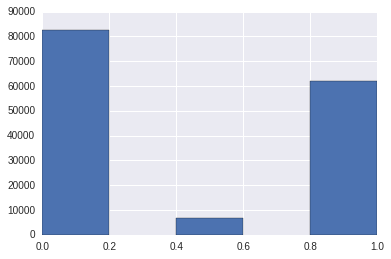

In [48]:
people_id = pd.merge(people[['people_id']], 
                   activities_train[['people_id', 'outcome']], 
                   on='people_id', 
                   left_index=True)

avg_outcome_of_each_person = people_id.groupby('people_id')['outcome'].mean()

number_of_people_ones = (avg_outcome_of_each_person == 1.0).sum()
number_of_people_zeros = (avg_outcome_of_each_person == 0.0).sum()
number_of_people_mixed = ((avg_outcome_of_each_person != 1.0) & (avg_outcome_of_each_person != 0.0)).sum()

plt.bar([0.0, 0.4, 0.8], [number_of_people_zeros, number_of_people_mixed, number_of_people_ones], width=0.2)

<Container object of 3 artists>

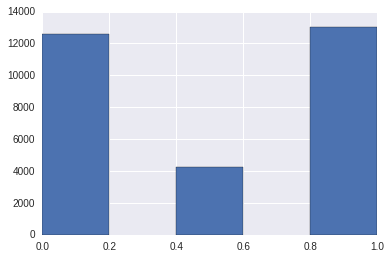

In [50]:
group_1 = pd.merge(people[['people_id', 'group_1']], 
                   activities_train[['people_id', 'outcome']], 
                   on='people_id', 
                   
                   left_index=True).drop('people_id', axis=1)

avg_outcome_of_each_group = group_1.groupby('group_1')['outcome'].mean()

number_of_groups_ones = (avg_outcome_of_each_group == 1.0).sum()
number_of_groups_zeros = (avg_outcome_of_each_group == 0.0).sum()
number_of_groups_mixed = ((avg_outcome_of_each_group != 1.0) & (avg_outcome_of_each_group != 0.0)).sum()

plt.bar([0.0, 0.4, 0.8], [number_of_groups_zeros, number_of_groups_mixed, number_of_groups_ones], width=0.2)